# Exploring the Potential Benefits of Music on Mental Health and Anxiety: A 2022 Survey Analysis

## I. Background

### I.I Objective
The purpose of this study is to explore how music can give positive impact on mental well-being, specifically to youth and adults aged less than 40 years old.
    

### I.II About Datasets
We have two datasets for this study:  

  a. Music & Mental Health Survey Results (main dataset) on 2022.    
* The survey provides behavioral and psychological information of participants related to listening to music.  

b. Global Mental Health Problem (supplementary 2).  
* The data shows the share of population with mental health problems in countries in 2021.
* The mental health problems include depression, anxiety, insomnia, ocd, and schizorphenia.

### I.III Exploratory Data Analysis Focus  
A. General Overview  
1. What's the overall situation for global mental health problem in 2021 and trend over years?
2. How's the distribution of population in survey based on age?

B. Focused Analysis
1. How's the proportion of population believing music improves their mental health?  
2. Which mental health problem is most frequent in the population?
3. Is there any correlation between the mental health problems?
4. Musical Exploration and Mental Health: Insights from Anxiety Frequency Distributions
5. Evaluation of Music Effect on Mental Health Based on Music Exploratory Behavior
6. Statistical Analyses to Confirm Impact of Music Exploratory Behavior on Mental Health
7. Association Between Music Genres and Anxiety
8. Correlation Between Music Effect and Frequency of Hearing Music Genres

## II. Data Preparation

### II.I Import Libraries

In [91]:
# data wrangling and statistical tests
import pandas as pd
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency, spearmanr,kruskal

# main data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# supplement data visualization
import plotly.express as px


### II.II Data Loading

#### Main Dataset: Relationship between Mental Health and Music
`about`: Survey on Music Effect to Mental Health, Preference to Music Genres, and Behaviours

In [47]:
# read the csv file
music_mental_health_data = pd.read_csv('mxmh_survey_results.csv')
music_mental_health_data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [48]:
# show information about the data
music_mental_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [49]:
# check general statistics of the data (categorical data)
music_mental_health_data.describe(include='object')

,Timestamp,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects,Permissions
count,736,735,733,732,735,736,736,732,736,736,...,736,736,736,736,736,736,736,736,728,736
unique,735,6,2,2,2,16,2,2,4,4,...,4,4,4,4,4,4,4,4,3,1
top,8/28/2022 16:15:08,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,...,Never,Never,Never,Very frequently,Never,Rarely,Very frequently,Never,Improve,I understand.
freq,2,458,579,497,609,188,525,404,259,343,...,443,280,264,277,225,215,330,236,542,736


In [50]:
# check statistics of the data
music_mental_health_data.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


#### Insights:
- Data cleaning is needed to reformat the column names and handle missing values.

#### Supplement Datasets: Global Mental Health in 2021 and Global Trends
- Proportion of people with mental health problems in 100 samples per country.

In [51]:
# get the supplement data
supp_data_2021 = pd.read_excel("global mental health 2021.xlsx")

supp_data_2021.head()

,country,percentage
0,Afghanistan,0.179
1,Albania,0.122
2,Algeria,0.153
3,American Samoa,0.113
4,Andorra,0.162


In [52]:
# check general info of supp data
supp_data_2021['percentage'] = supp_data_2021['percentage']*100
supp_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     204 non-null    object 
 1   percentage  204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


#### Insights:
- Supplementary is already clean, ready for visualization.

### II.III Data Cleaning
1. Change column name format into lower case and convert whitespace to '_'
2. Drop the rows which have nan values from 'Music effects' and unnecessary columns: Timestamp, BPM, Exploratory, Foreign Language, Permission.
3. Fill NaN values in other columns with mean (continuous data) or most frequent numbers (ordinal/categorical).

#### 1. Change column name format

In [53]:
# copy dataframe
music_mental_data = music_mental_health_data.copy()

# change into lower case
music_mental_data.columns = music_mental_data.columns.str.lower()

# remove all spaces on start and end points of column names,
# replace whitespace with underline
music_mental_data.columns = music_mental_data.columns.str.strip().str.replace(' ','_')

# replace [ and ] with ""
music_mental_data.columns = music_mental_data.columns.str.replace('[','').str.replace(']','')

# show result
music_mental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   736 non-null    object 
 1   age                         735 non-null    float64
 2   primary_streaming_service   735 non-null    object 
 3   hours_per_day               736 non-null    float64
 4   while_working               733 non-null    object 
 5   instrumentalist             732 non-null    object 
 6   composer                    735 non-null    object 
 7   fav_genre                   736 non-null    object 
 8   exploratory                 736 non-null    object 
 9   foreign_languages           732 non-null    object 
 10  bpm                         629 non-null    float64
 11  frequency_classical         736 non-null    object 
 12  frequency_country           736 non-null    object 
 13  frequency_edm               736 non

#### 2. Drop nan values from music effects and irrelevant columns

In [54]:
music_mental_data["music_effects"].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [55]:
# drop nan values from music_effects
music_mental_data = music_mental_data.dropna(subset=['music_effects'], axis = 0)
music_mental_data["music_effects"].unique()

array(['No effect', 'Improve', 'Worsen'], dtype=object)

In [56]:
# drop unrelated columns for the study
music_mental_data = music_mental_data.drop(columns=['timestamp','bpm','permissions'],axis = 1)
music_mental_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 2 to 735
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         727 non-null    float64
 1   primary_streaming_service   727 non-null    object 
 2   hours_per_day               728 non-null    float64
 3   while_working               726 non-null    object 
 4   instrumentalist             725 non-null    object 
 5   composer                    728 non-null    object 
 6   fav_genre                   728 non-null    object 
 7   exploratory                 728 non-null    object 
 8   foreign_languages           725 non-null    object 
 9   frequency_classical         728 non-null    object 
 10  frequency_country           728 non-null    object 
 11  frequency_edm               728 non-null    object 
 12  frequency_folk              728 non-null    object 
 13  frequency_gospel            728 non-null

#### 3. Fill NaN Values in Other Columns

In [57]:
# for numeric columns, fill with mean
num_cols = music_mental_data.select_dtypes(include = ['float64']).columns
music_mental_data[num_cols] = music_mental_data[num_cols].fillna(music_mental_data[num_cols].mean())

# for categorical columns, fill with most frequent data with imputer
cat_imputer = SimpleImputer(strategy='most_frequent')
    # get the categorical column names
cat_cols = music_mental_data.select_dtypes(include =['object']).columns
    # impute the values
imputed_cols = cat_imputer.fit_transform(music_mental_data[cat_cols])
    # replace the values with imputed values
music_mental_data[cat_cols] = imputed_cols

music_mental_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 2 to 735
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         728 non-null    float64
 1   primary_streaming_service   728 non-null    object 
 2   hours_per_day               728 non-null    float64
 3   while_working               728 non-null    object 
 4   instrumentalist             728 non-null    object 
 5   composer                    728 non-null    object 
 6   fav_genre                   728 non-null    object 
 7   exploratory                 728 non-null    object 
 8   foreign_languages           728 non-null    object 
 9   frequency_classical         728 non-null    object 
 10  frequency_country           728 non-null    object 
 11  frequency_edm               728 non-null    object 
 12  frequency_folk              728 non-null    object 
 13  frequency_gospel            728 non-null

## III. Data Visualization and Analysis (EDA)

### A. General Overview

#### 1. Global Mental Health Condition in 2021

In [58]:
# create the choropleth map
fig = px.choropleth(supp_data_2021, 
                    locations='country',  # Column with country names
                    locationmode='country names',  # Specify country names as the location type
                    color='percentage',  # Values to map
                    color_continuous_scale='Purples',  # Color scheme
                    title="Global Mental Health Problems Rate in 2021")

# change the title of the percentage legend
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Percentage (%)"  # Change this to your desired legend title
    )
)
# increase figure size
fig.update_layout(width=1000, height=600,title={'x':0.25,'y':0.85})

fig.show()

##### Insights:
- At least 10% of the total population of each country experience mental health problem. That is why we need to find ways to solve mental health problem.

In [59]:
# save choropleth map
fig.write_image("mental_health_problem_2021.png", width=1000, height=600, scale=3)


#### 2. Population Age Distribution

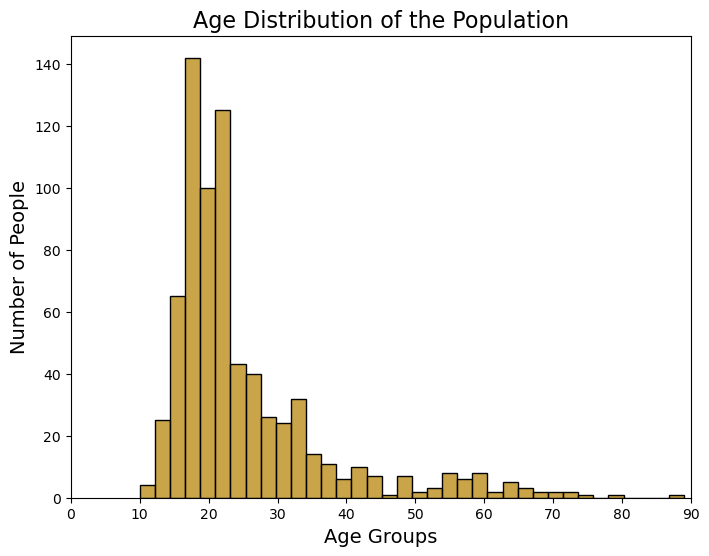

In [60]:
# make a histogram
plt.figure(figsize=(8,6))
sns.histplot(data=music_mental_data,x='age',color='darkgoldenrod')

# limit x and y axis values
plt.xlim(left=0,right=90)

# title and axis labels
plt.title('Age Distribution of the Population',fontsize= 16)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Number of People',fontsize=14)

plt.show()

##### Insights:
- The population distribution is right-skewed where the most of the data is found between 10 to 40 years of age.
- Afterwards, the population becomes very small with the increasing age.
- Since our focus will be how to make music enhancing mental health state on youth and adults, we will limit the age where data is sufficient ( < 40).

In [61]:
# make data subset where we take the desirable age range
age_filter = (music_mental_data['age'] <= 40)
sample_music_data = music_mental_data[age_filter].copy().reset_index().drop(columns='index',axis=1)
sample_music_data.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,frequency_classical,...,frequency_pop,frequency_r&b,frequency_rap,frequency_rock,frequency_video_game_music,anxiety,depression,insomnia,ocd,music_effects
0,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
1,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
2,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,Rarely,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
3,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,Sometimes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
4,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,Never,...,Sometimes,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve


### B. Focused Analysis

#### 1. How does the population think about music helping their mental health?

In [62]:
# make a new dataframe for counting size of music effect categories
music_effect_pop_distribution = sample_music_data.groupby('music_effects').size().reset_index()
music_effect_pop_distribution.rename(columns={0:'total_population'},inplace = True)

music_effect_pop_distribution

,music_effects,total_population
0,Improve,489
1,No effect,151
2,Worsen,17


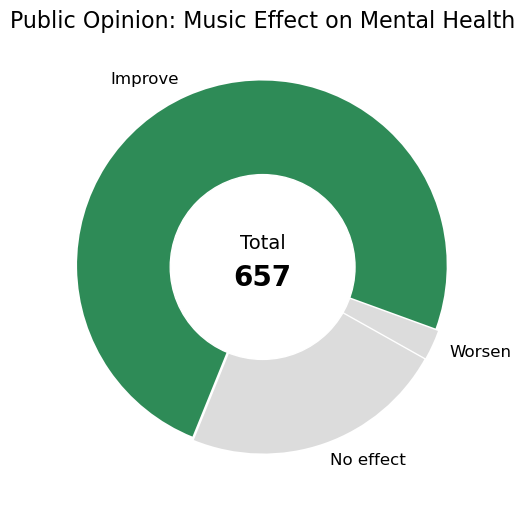

In [63]:
# make a donut plot
plt.figure(figsize = (10,6))

# Create color palette
colors = ['seagreen', 'gainsboro', 'gainsboro'] 
explode = [0.01, 0.01, 0.01]  # Explode to give white partition on each category

# make pie chart
plt.pie(data=music_effect_pop_distribution,x='total_population',
        labels=['Improve','No effect','Worsen'],
        colors=colors,startangle=340,
        textprops={'fontsize':12},
        explode=explode)

# make a circle to in the middle of the graph
white_circle = plt.Circle((0,0),0.5,color='white')
plt.gca().add_artist(white_circle)

# make title and annotation
plt.title("Public Opinion: Music Effect on Mental Health",fontsize=16)

# annotation on hole
plt.text(0,0.1,'Total',color='black',ha='center',fontsize=14)
plt.text(0,-0.1,'657',color='black',ha='center',fontsize=20,fontweight='bold')
plt.show()

##### Insights:
- The majority of the population (74%) believed that listening to music helped their mental health.

#### 2. Which Mental Health Problem is Most Frequent?
- Further analysis would be more focused on this mental health problem.

In [64]:
# get subset of data
mental_health_problems = sample_music_data[['anxiety','depression','insomnia','ocd']]

# melt dataset
melt_mental_health_problems = mental_health_problems.melt(var_name='mental_problems',value_name='intensity_lvl')
melt_mental_health_problems.head()

,mental_problems,intensity_lvl
0,anxiety,7.0
1,anxiety,7.0
2,anxiety,8.0
3,anxiety,4.0
4,anxiety,5.0


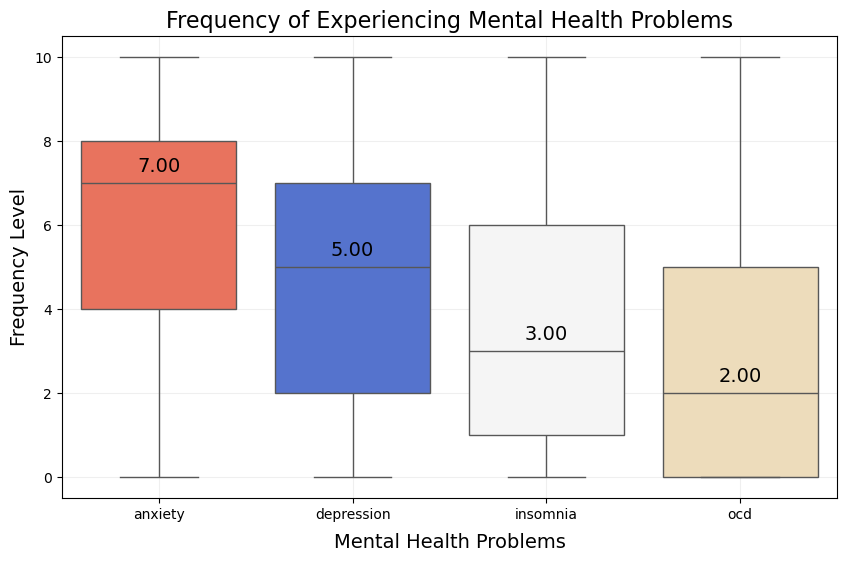

In [65]:
# make boxplot
plt.figure(figsize=(10,6))
MentalBoxPlot = sns.boxplot(data=melt_mental_health_problems,y='intensity_lvl',x='mental_problems',
            hue='mental_problems',palette=['tomato','royalblue','whitesmoke','#F5DEB3'])

# make annotation on median values
    # get the medians
median_values = melt_mental_health_problems.groupby('mental_problems')['intensity_lvl'].median().values

    # enumerate the values
for i,median in enumerate(median_values):
    MentalBoxPlot.annotate(f'{median:.2f}',xy=(i,median),xytext=(0,5),
                           textcoords='offset points', fontsize=14,
                           ha='center', va='bottom', color='black')

# title and axes labels
plt.title("Frequency of Experiencing Mental Health Problems",fontsize=16)
plt.xlabel('Mental Health Problems',fontsize=14,labelpad=8)
plt.ylabel('Frequency Level',fontsize=14)
plt.grid(alpha=0.2,zorder=0)
plt.show()

##### Insights:
- Based on the boxplot, the most frequent mental health problem experienced by the population was anxiety with median of 7. 
- Following anxiety, depression was also quite frequent with the median of 5.
- Meanwhile frequency of experiencing insomnia and ocd were relatively not as severe as the other two.

#### 3. Correlation Between Mental Health Problems

Text(0.5, 1.015, 'Spearman Correlation of Mental Health Problems')

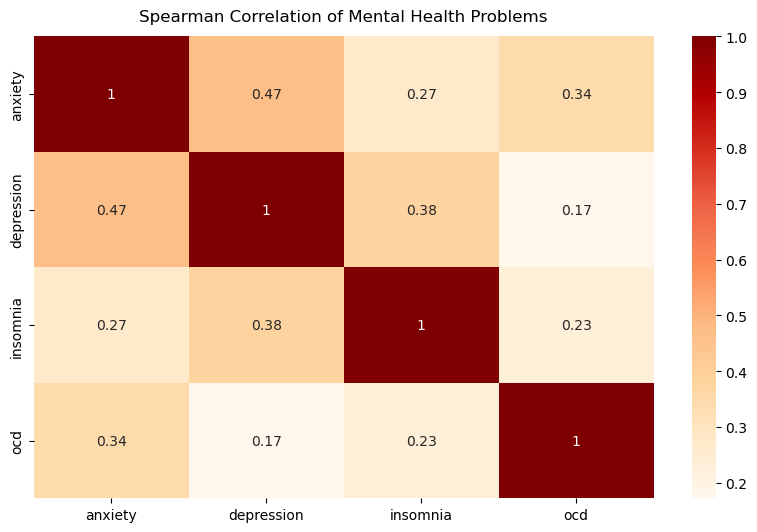

In [66]:
# copy from original dataset
correlation_data = sample_music_data.copy()

# make subset of dataframe from all variables involved in analysis
corr_data_subset_1 = correlation_data[['anxiety','depression','insomnia','ocd']]

# create correlation matrix: use spearman since we're dealing with all ordinal data
corr_matrix_1 = corr_data_subset_1.corr()

# make heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_1,annot=True,cmap='OrRd')
plt.title('Spearman Correlation of Mental Health Problems',y=1.015)

##### Insights:
The Spearman correlation heatmap illustrates the relationships between the frequencies of experiencing mental health problems: anxiety, depression, insomnia, and OCD.   

The strongest correlation was observed between anxiety and depression, with a correlation coefficient of 0.47. 

This was followed by a correlation of 0.38 between insomnia and depression, and a correlation of 0.34 between anxiety and OCD. 

These results suggest that individuals often experience combinations of mental health problems, and addressing one issue—such as anxiety—may positively impact the others, like depression or OCD.

#### 4. Musical Exploration and Mental Health: Insights from Frequency Distributions

In [67]:
# get subset of data
mental_health_problems_2 = sample_music_data[['exploratory','anxiety','depression','insomnia','ocd']]

# melt dataset
melt_mental_health_problems_2 = mental_health_problems_2.melt(id_vars='exploratory',var_name='mental_problems',value_name='intensity_lvl')
melt_mental_health_problems_2.head()

,exploratory,mental_problems,intensity_lvl
0,No,anxiety,7.0
1,Yes,anxiety,7.0
2,Yes,anxiety,8.0
3,Yes,anxiety,4.0
4,Yes,anxiety,5.0


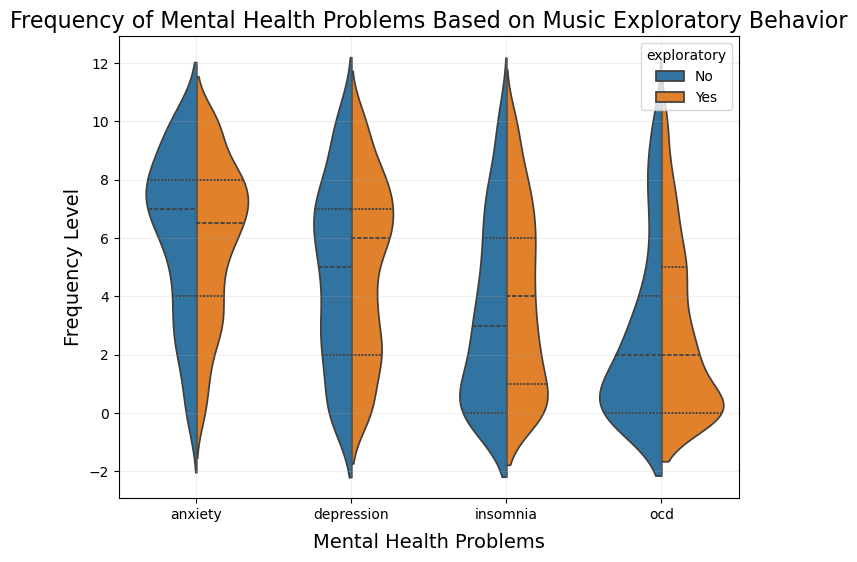

In [68]:
# create violin plot
plt.figure(figsize=(8,6))
ViolinPlot = sns.violinplot(data=melt_mental_health_problems_2,y='intensity_lvl',x='mental_problems',
            hue='exploratory',split=True,inner='quartile')

# title and axes labels
plt.title("Frequency of Mental Health Problems Based on Music Exploratory Behavior",fontsize=16)
plt.xlabel('Mental Health Problems',fontsize=14,labelpad=8)
plt.ylabel('Frequency Level',fontsize=14)
plt.grid(alpha=0.2,zorder=0)
plt.show()

##### Insights:
Based on the violin plot, the people who listened to more various types of musics (exploratory = yes or music explorers) had higher frequency of experiencing mental health problems, except of anxiety, than those who did not. This finding indicated a either possible positive or negative impact of exploring music genres on mental health problems.

Here is more detailed analysis based on median:
- For music explorers, the median frequency of anxiety was less by 0.5, at 6.5.
- In case of depression and insomnia, the music explorers have higher median frequency by 1 (depression = 6, insomnia = 4).
- Finally OCD had the same median frequency for both music explorers and non-music explorers at 2, but music explorers had higher Q3 by 1, at 5.

#### 5. Evaluation of Music Effect on Mental Health Based on Music Exploratory Behavior

In [69]:
# get subset exploratory, music effect, and total population count
explore_vs_mental_state = music_mental_data.groupby(['exploratory','music_effects']).size().reset_index().rename(columns={0:'total_population'})
explore_vs_mental_state

,exploratory,music_effects,total_population
0,No,Improve,132
1,No,No effect,68
2,No,Worsen,7
3,Yes,Improve,410
4,Yes,No effect,101
5,Yes,Worsen,10


In [70]:
# use transform to find total population for exploratory categories
explore_vs_mental_state['sum_population'] = explore_vs_mental_state.groupby('exploratory')['total_population'].transform('sum')
# calculate the percentages
explore_vs_mental_state['percentage'] = round(explore_vs_mental_state['total_population']*100/explore_vs_mental_state['sum_population'],2)

explore_vs_mental_state

,exploratory,music_effects,total_population,sum_population,percentage
0,No,Improve,132,207,63.77
1,No,No effect,68,207,32.85
2,No,Worsen,7,207,3.38
3,Yes,Improve,410,521,78.69
4,Yes,No effect,101,521,19.39
5,Yes,Worsen,10,521,1.92


In [71]:
# Step 3: Pivot the data to get a wide format for stacked bars
df_pivot = explore_vs_mental_state.pivot(index='exploratory', columns='music_effects', values='percentage')
df_pivot

music_effects,Improve,No effect,Worsen
exploratory,,,
No,63.77,32.85,3.38
Yes,78.69,19.39,1.92


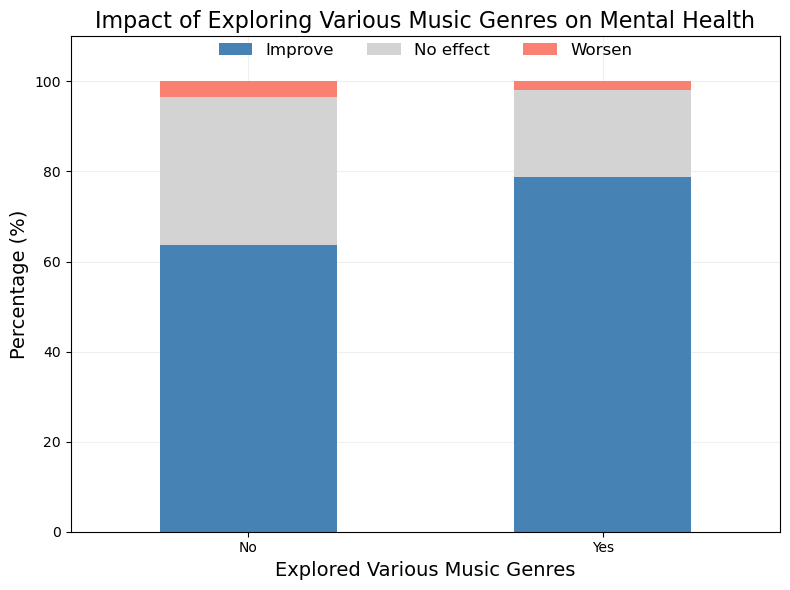

In [105]:
# Plotting the stacked bar chart using Matplotlib
df_pivot.plot(kind='bar',stacked=True, color=['steelblue', 'lightgray', 'salmon'], figsize=(8, 6),zorder=2)

# Customize the plotL axes labels, title, legend
plt.xlabel('Explored Various Music Genres',fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('Impact of Exploring Various Music Genres on Mental Health',fontsize=16)

# to emphasize the difference, add horizontal line
# plt.axhline(y=63.7, color='lightcoral', linestyle='--')
# plt.axhline(y=78.7, color='lightcoral', linestyle='--')

# set y limit
plt.ylim(0,110)

# set legend location (above the plot, inside chart)
plt.legend(loc='upper center',frameon=False,borderaxespad=0,
           ncol = 3,fontsize=12)


# Show the plot
plt.tight_layout()
plt.grid(alpha=0.2,zorder=0)
plt.show()

##### Insights:
- Exploring various music genres group has a more positive impact on mental health by increasing the proportion of improvements and reducing cases of no effect or worsening.
- We need to confirm whether these potential associations are statistically significant or not with Chi-Square Test. 

#### 6. Statistical Analyses to Confirm Impact of Music Exploratory Behavior on Mental Health

##### 6a. Chi-Square Test Between Music Exploratory and Music Effect
- This test is suitable for checking relationship of the variables since music exploratory behavior is a binary variable while music effect is an ordinal variable.

$H_0$ : There is no significant association between music exploratory behavior and music effects.

$H_1$ : There is a significant association between music exploratory behavior and music effects.

In [90]:
# generate the contingency table
contingency_table = pd.crosstab(sample_music_data['music_effects'], sample_music_data['exploratory'], 
                                 rownames=['Music Effect'], 
                                 colnames=['Music Exploratory Behavior'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"\nChi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant association between music exploratory behavior and music effect (reject null hypothesis).")
else:
    print("There is no significant association (fail to reject null hypothesis).")


Chi-Square Statistic: 18.86006040789641
P-Value: 8.027677522422912e-05
Degrees of Freedom: 2
Expected Frequencies Table:
[[127.2739726  361.7260274 ]
 [ 39.30136986 111.69863014]
 [  4.42465753  12.57534247]]
There is a significant association between music exploratory behavior and music effect (reject null hypothesis).


##### Insights:
Based on the comparison plot and subsequent analysis, there is a significant association between music exploratory behavior and music effect on mental health. Specifically, individuals who engage in music exploration are positively correlated with better music effects, indicating that exploring various music genres is associated with improved mental health outcomes.

##### 6b. Kruskal-Wallis H Test Between Frequency of Experiencing Anxiety and Music Effect
- Both frequency of experiencing mental health problems and music effects are ordinal variables. They have no consistent and meaningful intervals between the categories.
- Therefore, Kruskal-Wallis H Test is suitable since it does not assume normality and suitable for ordinal data.

$H_0$ : There is no significant difference in the frequency of experiencing mental health problems among different music effect categories.

$H_1$ : At least one music effect category has a different frequency of experiencing mental health problems.

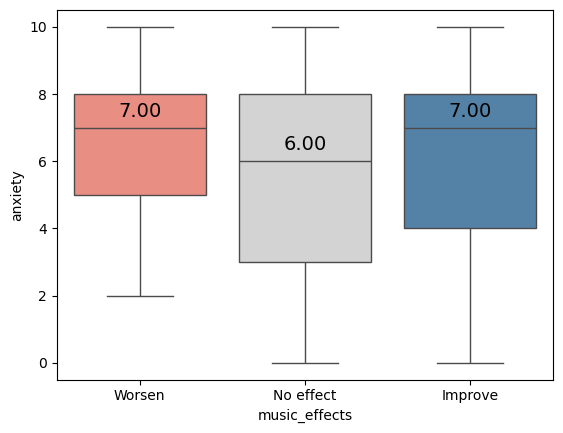

In [106]:

# Make distribution plot
palette = {'Improve': 'steelblue', 'No effect': 'lightgray', 'Worsen': 'salmon'}
BoxPlot = sns.boxplot(data=sample_music_data,x='music_effects',y='anxiety',order=['Worsen','No effect','Improve'],
            hue='music_effects',palette=palette)

# make annotation on median values
    # get the medians
median_vals = sample_music_data.groupby('music_effects')['anxiety'].median().values

    # enumerate the values
for i,median in enumerate(median_vals):
    BoxPlot.annotate(f'{median:.2f}',xy=(i,median),xytext=(0,5),
                           textcoords='offset points', fontsize=14,
                           ha='center', va='bottom', color='black')

In [98]:
# Group the data based on music effects
groups = [sample_music_data['anxiety'][sample_music_data['music_effects'] == effect].values for effect in sample_music_data['music_effects'].unique()]

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(*groups)

# Print the results
print(f"Kruskal-Wallis H-test statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in anxiety frequencies across music effect categories (reject null hypothesis).")
else:
    print("There is no significant difference in anxiety frequencies (fail to reject null hypothesis).")

Kruskal-Wallis H-test statistic: 9.982908373876295
P-value: 0.006795774976165818
There is a significant difference in anxiety frequencies across music effect categories (reject null hypothesis).


##### Insights:
Based on the comparison plot and subsequent analysis, there is a significant association between music exploratory behavior and music effect on mental health. Specifically, individuals who engage in music exploration are positively correlated with better music effects, indicating that exploring various music genres is associated with improved mental health outcomes.

#### 7. Association Between Music Genres and Anxiety

##### Data Wrangling Process

In [73]:
# copy dataset for mapping
mapped_mental_data = sample_music_data.copy()

# create mapping
frequency_mapping = {'Never':1,'Rarely':2,'Sometimes':3,'Very frequently': 4}

# apply mapping
mapped_mental_data = mapped_mental_data.replace(frequency_mapping)

# get subset data where anxiety level <= 5
# mapped_mental_data = mapped_mental_data[mapped_mental_data['anxiety']<=5]

mapped_mental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         657 non-null    float64
 1   primary_streaming_service   657 non-null    object 
 2   hours_per_day               657 non-null    float64
 3   while_working               657 non-null    object 
 4   instrumentalist             657 non-null    object 
 5   composer                    657 non-null    object 
 6   fav_genre                   657 non-null    object 
 7   exploratory                 657 non-null    object 
 8   foreign_languages           657 non-null    object 
 9   frequency_classical         657 non-null    int64  
 10  frequency_country           657 non-null    int64  
 11  frequency_edm               657 non-null    int64  
 12  frequency_folk              657 non-null    int64  
 13  frequency_gospel            657 non

In [74]:
# initiate a list to store the frequently heard music genre in the population
frequent_listened_music = []
def frequency_music_finder(mapped_mental_data):
    for col in mapped_mental_data.iloc[:,9:25].columns:
        # frequencies= {'Never':1,'Rarely':2,'Sometimes':3,'Very frequently': 4}
        count_all_frequencies = mapped_mental_data[col].value_counts().reset_index()

        # to find very frequently heard music, find proportion of sum of "3" and "4"/sum all
        very_frequent_fraction = count_all_frequencies.loc[(count_all_frequencies[col]==4)|(count_all_frequencies[col]==3),'count'].sum()/count_all_frequencies.values.sum()

        # if the proportion is more than 0.4: chosen since higher threshold gives less music genre options
        if very_frequent_fraction > 0.35:
            # format the col name for filter music genres
            col_name_changer = col.replace('frequency_',"").replace('_',' ').capitalize()
            if col_name_changer == 'R&b':
                frequent_listened_music.append('R&B')
            else:
                frequent_listened_music.append(col_name_changer)
    return frequent_listened_music

frequent_listened_music = frequency_music_finder(mapped_mental_data)
frequent_listened_music

['Classical',
 'Hip hop',
 'Lofi',
 'Metal',
 'Pop',
 'R&B',
 'Rap',
 'Rock',
 'Video game music']

In [75]:
# create filter for music genre based on created list
music_genre_filter = mapped_mental_data['fav_genre'].isin(frequent_listened_music)

# make group dataset
avg_mental_problems = mapped_mental_data[music_genre_filter].groupby(['fav_genre','music_effects'])[['anxiety','depression','insomnia','ocd']].mean().reset_index()
avg_mental_problems


,fav_genre,music_effects,anxiety,depression,insomnia,ocd
0,Classical,Improve,5.161290,4.322581,4.161290,2.516129
1,Classical,No effect,4.846154,3.538462,2.692308,2.076923
2,Classical,Worsen,7.000000,9.000000,2.000000,8.000000
3,Hip hop,Improve,6.366667,5.666667,3.100000,3.100000
4,Hip hop,No effect,5.500000,6.750000,4.750000,0.250000
5,Lofi,Improve,6.100000,6.600000,5.600000,3.400000
6,Metal,Improve,6.190476,5.396825,4.714286,2.682540
7,Metal,No effect,3.800000,3.750000,4.050000,1.550000
8,Pop,Improve,6.391026,4.570513,3.320513,2.891026
9,Pop,No effect,5.500000,4.545455,3.454545,3.227273


##### Comparison Plot Among Music Genres and Correlation Test for Anxiety

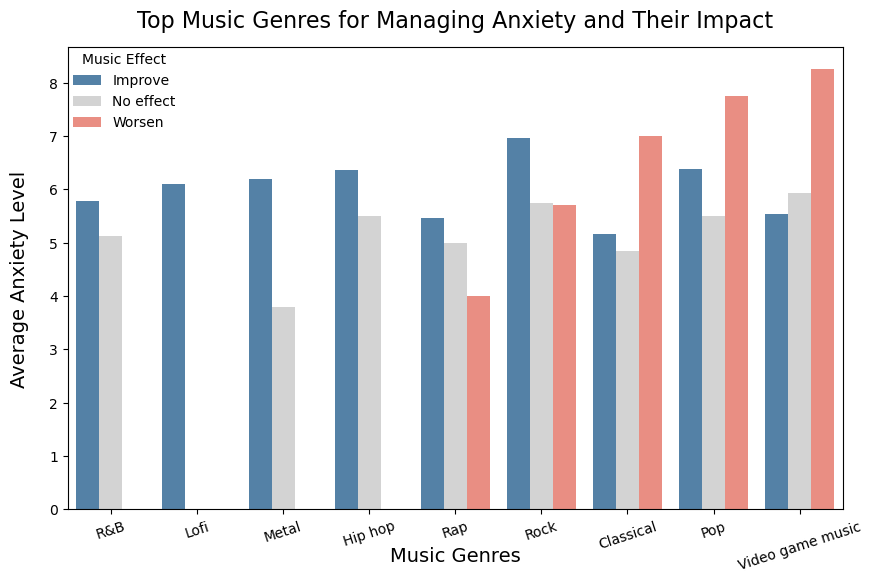

In [76]:
# plot for anxiety
plt.figure(figsize=(10,6))
palette = {'Improve': 'steelblue', 'No effect': 'lightgray', 'Worsen': 'salmon'}
clusterbar = sns.barplot(data=avg_mental_problems,x='fav_genre',y='anxiety',
            hue='music_effects',palette=palette,
            order = ['R&B','Lofi','Metal','Hip hop','Rap','Rock','Classical','Pop','Video game music'])

# Customize the plot
plt.title('Top Music Genres for Managing Anxiety and Their Impact',y=1.025,fontsize=16)
plt.xlabel('Music Genres',rotation = 0,fontsize=14)
clusterbar.xaxis.set_label_coords(0.5,-0.08)
plt.ylabel('Average Anxiety Level',fontsize=14)
clusterbar.yaxis.set_label_coords(-0.05,0.5)

plt.xticks(rotation=18)
plt.legend(title='Music Effect',loc='upper left',frameon=False, borderaxespad = 0, ncol = 1)

plt.show()

In [77]:
# create mapping
frequency_mapping = {'Never':1,'Rarely':2,'Sometimes':3,'Very frequently': 4}
music_effect_mapping = {'No effect':0,'Improve':1,'Worsen':-1}

# apply mapping
mapped_mental_data_2 = mapped_mental_data.replace(frequency_mapping)
mapped_mental_data_2 = mapped_mental_data_2.replace(music_effect_mapping)

# mapped_mental_data_2 = sample_music_data.replace(music_effect_mapping)

mapped_mental_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         657 non-null    float64
 1   primary_streaming_service   657 non-null    object 
 2   hours_per_day               657 non-null    float64
 3   while_working               657 non-null    object 
 4   instrumentalist             657 non-null    object 
 5   composer                    657 non-null    object 
 6   fav_genre                   657 non-null    object 
 7   exploratory                 657 non-null    object 
 8   foreign_languages           657 non-null    object 
 9   frequency_classical         657 non-null    int64  
 10  frequency_country           657 non-null    int64  
 11  frequency_edm               657 non-null    int64  
 12  frequency_folk              657 non-null    int64  
 13  frequency_gospel            657 non

In [86]:
# check statistical significance with spearman test
def spearman_test(col1,col2,df):
    spearman_corr, p_value = spearmanr(df[col1], df[col2])
    # only print the statistically significant relationship results
    if p_value < 0.05:
        print(f"Spearman Corr: {col1} and {col2}")
        print(f'corr-value: {round(spearman_corr,3)}, p-value: {round(p_value,3)}')
        print(f'statistically significant relationship')
        print("")


In [87]:
# show all correlation result between anxiety and frequency hearing music genre
for genre in frequent_listened_music:
    genre_name_changer = 'frequency_' + genre.replace(' ','_').lower()
    spearman_test(genre_name_changer,'anxiety',mapped_mental_data_2)

Spearman Corr: frequency_pop and anxiety
corr-value: 0.084, p-value: 0.03
statistically significant relationship

Spearman Corr: frequency_rock and anxiety
corr-value: 0.115, p-value: 0.003
statistically significant relationship



##### Insights:
- more frequent listening to pop and rock is associated with higher anxiety level.

#### 8. Correlation Between Music Effect and Frequency of Hearing Music Genres

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'lofi'),
  Text(1.5, 0, 'metal'),
  Text(2.5, 0, 'hip_hop'),
  Text(3.5, 0, 'r&b'),
  Text(4.5, 0, 'pop'),
  Text(5.5, 0, 'rock'),
  Text(6.5, 0, 'classical'),
  Text(7.5, 0, 'video_game_music'),
  Text(8.5, 0, 'music_effects')])

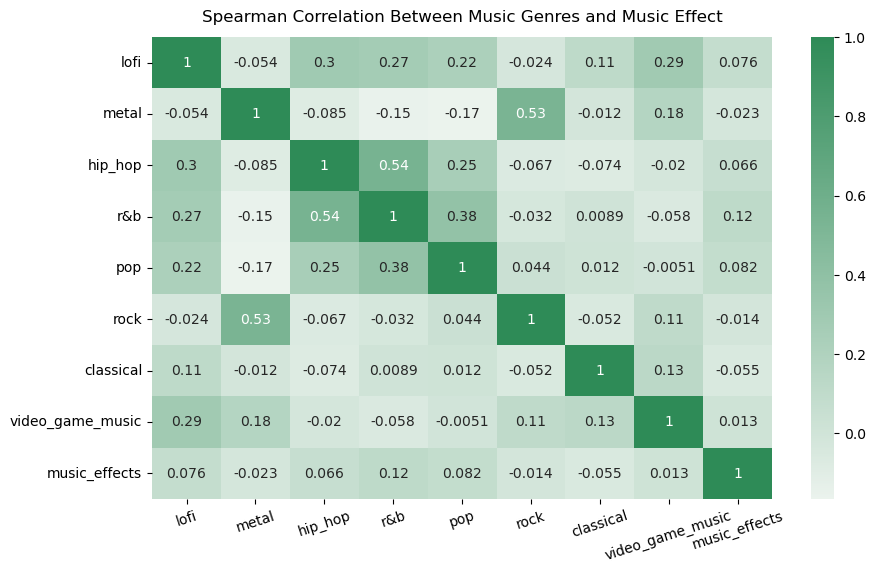

In [80]:
# whether favorite music genres are associated with lower anxiety level
# copy from original dataset
correlation_data = mapped_mental_data_2.copy()
correlation_data.columns = correlation_data.columns.str.replace('frequency_',"",regex=False)

custom_pastel_cmap = sns.light_palette("seagreen", as_cmap=True)

# make subset of dataframe from all variables involved in analysis
corr_data_subset_2 = correlation_data[['lofi','metal','hip_hop','r&b',
                                        'pop','rock','classical','video_game_music',
                                           'music_effects']]

# create correlation matrix: use spearman since we're dealing with all ordinal data
corr_matrix_2 = corr_data_subset_2.corr(method='spearman')

# make heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_2,annot=True,cmap=custom_pastel_cmap)
plt.title('Spearman Correlation Between Music Genres and Music Effect',y=1.015)
plt.xticks(rotation =18)

In [88]:
# show all results spearman between frequency hearing music 
for genre in frequent_listened_music:
    genre_name_changer = 'frequency_' + genre.replace(' ','_').lower()
    spearman_test(genre_name_changer,'music_effects',mapped_mental_data_2)

Spearman Corr: frequency_pop and music_effects
corr-value: 0.082, p-value: 0.036
statistically significant relationship

Spearman Corr: frequency_r&b and music_effects
corr-value: 0.116, p-value: 0.003
statistically significant relationship



##### Insight:
- more frequent listening to pop and R&B is associated with improved mental health.

# IV. Conclusion and Future Directions

This study found that both listening behavior and music genres are associated with improved mental health. We focused our analysis on anxiety, as it is the most frequently reported issue in the population and is positively associated with other mental health problems. Therefore, addressing anxiety could potentially alleviate other related mental health issues.

Our conclusions are organized into three parts:

**Benefits of Being a Music Explorer**  
The violin plot indicated a potential dual effect of music exploratory behavior on mental health, as reflected in higher median anxiety frequency levels. This finding suggests that exploratory behavior may improve mental health for some individuals while not benefiting others. However, the comparison plot showed a positive association between music exploratory behavior and mental effects, confirmed as statistically significant by the Chi-Squared Test. This implies that engaging in music exploration might enhance overall well-being.

**Music Genres to Avoid**  
Our Spearman correlation tests revealed that frequent listening to emotionally intense pop and rock music is associated with higher anxiety levels. Therefore, these genres may be best avoided during times of heightened anxiety.  

**Potential Music Genres to Try**  
Conversely, listening to R&B and energetic, cheerful pop music is linked to positive mental health effects. The diverse nature of pop music, spanning from upbeat to melancholic tunes, may provide valuable emotional support. Additionally, genres such as R&B, Lofi, metal, and hip-hop do not appear to worsen mental health. While the potential positive effects of these genres on reducing anxiety are not conclusively supported by correlation tests, increased listening to R&B is correlated with improved mental well-being.

**Future Directions**  
Further research is needed to fully understand the complex relationship between music genres and mental health. Additionally, this study is limited to a population aged 40 years and younger. Expanding the study to include a more balanced sample across various age groups could enhance the investigation and lead to more tailored recommendations.

